In [2]:
# Install if not already available (run once)
# % pip install nltk newspaper3k beautifulsoup4 requests --quiet

In [3]:
# Imports
import nltk
import requests
from bs4 import BeautifulSoup
from newspaper import Article
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from time import sleep
import warnings
warnings.filterwarnings('ignore')

# Sentiment Analysis

In [4]:
# Download NLTK VADER lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MP_Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Keyword selection  +  Sentiment Classification Logic

In [5]:
# Keyword lists
buy_keywords = ['buy', 'bullish', 'rally', 'upside', 'invest', 'long']
sell_keywords = ['sell', 'bearish', 'crash', 'overvalued', 'dump', 'short']
hold_keywords = ['hold', 'wait', 'stable', 'uncertain', 'pause']

def classify_sentiment(text, compound_score):
    text_lower = text.lower()
    
    if compound_score >= 0.3:
        if any(word in text_lower for word in buy_keywords):
            return 'buy'
        elif any(word in text_lower for word in hold_keywords):
            return 'hold'
        else:
            return 'buy'
    elif compound_score <= -0.3:
        if any(word in text_lower for word in sell_keywords):
            return 'sell'
        else:
            return 'sell'
    elif any(word in text_lower for word in hold_keywords):
        return 'hold'
    else:
        return 'neutral'

Collection of articles

In [6]:
search_url = "https://u.today/search/node?keys=Bitcoin"
response = requests.get(search_url)
soup = BeautifulSoup(response.text, 'html.parser')



# Extract article titles, dates, authors, and links
articles = soup.find_all('div', class_='news__item')
data = []
seen = set()
for article in articles:
    # Link
    link_tag = article.find('a', class_='news__item-body')
    link = link_tag['href'] if link_tag and link_tag.has_attr('href') else 'No Link'

    # Use (title, date, author, link) as a unique identifier
    identifier = (link)
    if identifier not in seen:
        data.append({
            'Link': link
        })
        seen.add(identifier)





# Process each article link
print(f"Found {len(data)} article links.")

Found 58 article links.


Classification of articles according sentiment analysis + keywords

In [7]:
results = {'buy': 0, 'hold': 0, 'sell': 0, 'neutral': 0}
article_data = []

# Limit number for demo (can remove data[:10] to get all)
for item in data:
    try:
        url = item['Link']  # Extract the URL string from the dict
        article = Article(url)
        article.download()
        article.parse()
        text = article.text

        if len(text) < 200:
            continue

        score = sia.polarity_scores(text)['compound']
        sentiment = classify_sentiment(text, score)
        results[sentiment] += 1

        article_data.append({
            'title': article.title,
            'url': url,
            'sentiment': sentiment
        })

        print(f"[{sentiment.upper()}] {article.title}")
        sleep(1)  # Be nice to the site

    except Exception as e:
        print(f"Error with {url}: {e}")

[SELL] Bitcoin's 900,000th Block Has Been Mined. How Many Are Left?
[BUY] Bitcoin Might Never Trade Below $48K Again
[BUY] Secret Ethereum (ETH) Golden Bull Run Incoming? Solana (SOL) Enters Freefall, Bitcoin (BTC): Now or Never?
[NEUTRAL] Here's Who Sent Ross Ulbricht $31 Million in Bitcoin
[BUY] Cypherpunk Cited by Satoshi Urges Musk to Pivot to Bitcoin
[BUY] Breaking: Enormous Whale Gets Liquidated as Bitcoin Price Sinks Lower
[SELL] Bitcoin Rockets 3,399% in Abnormal Liquidation Imbalance in Hourly Bloodbath
[SELL] Bitcoin (BTC) Price Prediction for June 5
[BUY] Peter Schiff Issues Brutal 'Bitcoin Top' Signal
[NEUTRAL] 'Buy Bitcoin': Mike Novogratz Issues Grim $50 Trillion Prediction
[SELL] 'Rich Dad Poor Dad' Author: Bitcoin to $1 Million As Biggest Financial Collapse Begins
[BUY] Bitcoin Block #899826 Mined by Solo Miner: Here's How Much Was Made
[BUY] NBA Legend Scottie Pippen Issues Major Bitcoin Call to Community
[SELL] Bitcoin (BTC) Signals Mini-Death Cross, This Shiba Inu (S

check : [SELL] 'Buy Bitcoin': Musk's $5 Trillion Debt Warning Seen as BTC Endorsement


In [8]:
print("\n--- Final Sentiment Classification ---")
for category, count in results.items():
    print(f"{category.title()}: {count} articles")


--- Final Sentiment Classification ---
Buy: 43 articles
Hold: 0 articles
Sell: 10 articles
Neutral: 5 articles


In [9]:
import pandas as pd

df = pd.DataFrame(article_data)
df

,title,url,sentiment
0,"Bitcoin's 900,000th Block Has Been Mined. How ...",https://u.today/bitcoins-900000th-block-has-be...,sell
1,Bitcoin Might Never Trade Below $48K Again,https://u.today/bitcoin-might-never-trade-belo...,buy
2,Secret Ethereum (ETH) Golden Bull Run Incoming...,https://u.today/secret-ethereum-eth-golden-bul...,buy
3,Here's Who Sent Ross Ulbricht $31 Million in B...,https://u.today/heres-who-sent-ross-ulbricht-3...,neutral
4,Cypherpunk Cited by Satoshi Urges Musk to Pivo...,https://u.today/cypherpunk-cited-by-satoshi-ur...,buy
5,Breaking: Enormous Whale Gets Liquidated as Bi...,https://u.today/breaking-enormous-whale-gets-l...,buy
6,"Bitcoin Rockets 3,399% in Abnormal Liquidation...",https://u.today/bitcoin-rockets-3399-in-abnorm...,sell
7,Bitcoin (BTC) Price Prediction for June 5,https://u.today/bitcoin-btc-price-prediction-f...,sell
8,Peter Schiff Issues Brutal 'Bitcoin Top' Signal,https://u.today/peter-schiff-issues-brutal-bit...,buy
9,'Buy Bitcoin': Mike Novogratz Issues Grim $50 ...,https://u.today/buy-bitcoin-mike-novogratz-iss...,neutral


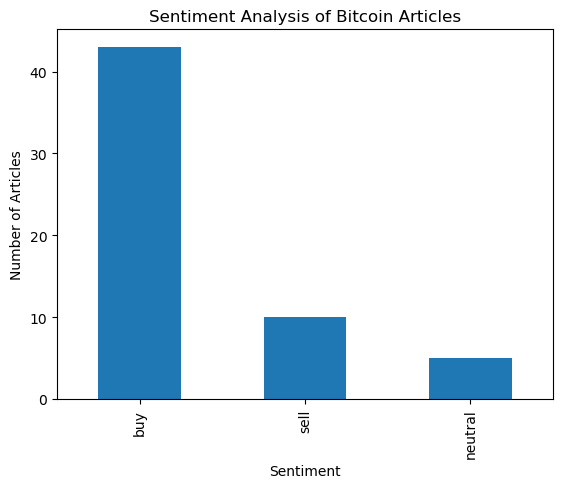

In [10]:
# Bar chart of sentiment counts
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Analysis of Bitcoin Articles')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()